In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../input/new-york-city-taxi-fare-prediction/train.csv", nrows = 1000000)
test = pd.read_csv("../input/new-york-city-taxi-fare-prediction/test.csv")

In [3]:
train.shape

(1000000, 8)

In [4]:
test.shape

(9914, 7)

In [5]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [6]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
train['fare_amount'].describe()

count    1000000.000000
mean          11.348079
std            9.822090
min          -44.900000
25%            6.000000
50%            8.500000
75%           12.500000
max          500.000000
Name: fare_amount, dtype: float64

In [8]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(999962, 8)

In [9]:
train['fare_amount'].describe()

count    999962.000000
mean         11.348742
std           9.821550
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [10]:
train['fare_amount'].sort_values(ascending=False)

101885    500.00
247671    495.00
287638    450.00
329010    450.00
233874    450.00
451974    400.00
361793    400.00
951810    347.54
578919    287.08
130460    281.05
309769    263.25
719764    262.04
142550    255.00
888472    250.25
351584    250.00
217225    245.41
786490    243.00
149769    240.00
168218    235.00
202499    225.00
612128    220.00
806692    220.00
196990    217.00
416989    215.00
225249    215.00
784935    215.00
285659    214.33
110337    212.00
215662    211.44
979151    210.00
           ...  
671873      0.01
895361      0.00
762802      0.00
331597      0.00
266485      0.00
520715      0.00
670254      0.00
489767      0.00
938020      0.00
27891       0.00
897211      0.00
788466      0.00
957590      0.00
930680      0.00
386734      0.00
47302       0.00
760662      0.00
942215      0.00
431819      0.00
949564      0.00
436658      0.00
175352      0.00
10002       0.00
561786      0.00
681342      0.00
689250      0.00
211455      0.00
211499      0.

In [11]:
train['passenger_count'].describe()

count    999962.000000
mean          1.684925
std           1.323912
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [12]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [13]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [14]:
train['passenger_count'].describe()

count    999961.000000
mean          1.684719
std           1.307737
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [15]:
train['pickup_latitude'].describe()

count    999961.000000
mean         39.929057
std           7.626092
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [16]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [17]:
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012-05-24 22:44:00.00000088,5.3,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012-04-12 07:31:00.00000027,5.7,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1


In [18]:
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)

In [19]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [20]:
train['diff_lat'] = ( train['dropoff_latitude'] - train['pickup_latitude']).abs()
train['diff_long'] = (train['dropoff_longitude'] - train['pickup_longitude'] ).abs()

In [21]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
diff_lat             10
diff_long            10
dtype: int64

In [22]:
train = train.dropna(how = 'any', axis = 'rows')

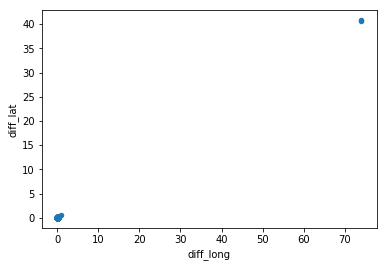

In [23]:
plot = train.iloc[:2000].plot.scatter('diff_long', 'diff_lat')

In [24]:
train = train[(train.diff_long < 5.0) & (train.diff_lat < 5.0)]

In [25]:
def get_input_matrix(df):
    return np.column_stack((df.diff_long, df.diff_lat, np.ones(len(df))))

train_X = get_input_matrix(train)
train_y = np.array(train['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(997989, 3)
(997989,)


In [26]:
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(w)

[146.13755811  89.2492332    6.17095316]


In [27]:
test['diff_lat'] = ( test['dropoff_latitude'] - test['pickup_latitude']).abs()
test['diff_long'] = (test['dropoff_longitude'] - test['pickup_longitude'] ).abs()

In [28]:
test_X = get_input_matrix(test)

In [29]:
test_y = np.matmul(test_X, w).round(decimals = 2)

In [30]:
submission = pd.DataFrame()
submission["key"] = test.key
submission["fare_amount"] = test_y
submission.to_csv('submission.csv', index = False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 